# Predicting Subscription Churn 

**Task**: Analyze churn rate for a subscription-based personal finance business.

Churn rate is defined as the proportion of members who cancel their subscription. A 20% churn rate can also be referred to as an 80% retention rate.

**Goals**: 
* Calculate average churn rate over the last 9 months for each price tier.
* Predict the number of currently active subscriptions that will still be active next month.
* Predict the number of currently active subscriptions that will still be active in 3 months.
* Build a separate model that predicts tenure based on price tier, source, and country.
* Provide actionable insights to the business.

**Data**:

The data is in one table called 9mo_pull.csv. It contains data for all members who subscribed to a personal finance SaaS exactly 9 months ago. It does not contain data for members who subscribed since then. In other words, each member in the dataset has the same start date.

**Data Dictionary**:

member_id - Unique ID of the user.  
tier - Price tier (Silver, Gold, or Platinum).  
country - Member country.  
source - Original acquisition channel.  
tenure - Number of cycles billed. Min is 1. Max is 9.  
active - Is the subscription still active?  

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('9mo_pull.csv')

## Exploratory Data Analysis

In [3]:
df.shape

(99944, 6)

In [4]:
df.describe()

,member_id,tenure,active
count,9.994400e+04,99944.000000,99944.000000
mean,4.997105e+07,2.569229,0.074962
std,2.880743e+07,2.453557,0.263331
min,6.290000e+02,1.000000,0.000000
25%,2.498473e+07,1.000000,0.000000
50%,4.999141e+07,1.000000,0.000000
75%,7.476738e+07,3.000000,0.000000
max,9.999681e+07,9.000000,1.000000


In [5]:
df.isnull().sum()

member_id    0
tier         0
country      0
source       0
tenure       0
active       0
dtype: int64

In [6]:
df.head(10)

,member_id,tier,country,source,tenure,active
0,12428284,Platinum,Germany,referral,6,0
1,39743027,Platinum,France,referral,1,0
2,59559187,Silver,UK,organic,1,0
3,46170183,Silver,UK,organic,4,0
4,14600427,Gold,France,organic,1,0
5,66414091,Silver,Germany,organic,1,0
6,624565,Gold,Germany,referral,8,0
7,79845424,Platinum,Netherlands,organic,1,0
8,65813196,Gold,US,referral,9,1
9,33783639,Silver,US,organic,1,0


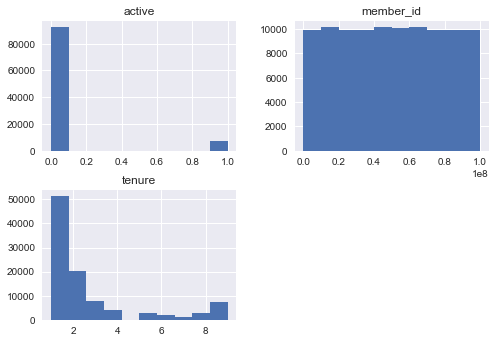

In [7]:
df.hist()
plt.show()

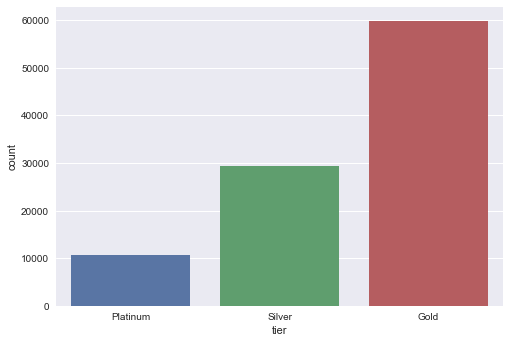

In [8]:
sns.countplot(x='tier',data=df)
plt.show()

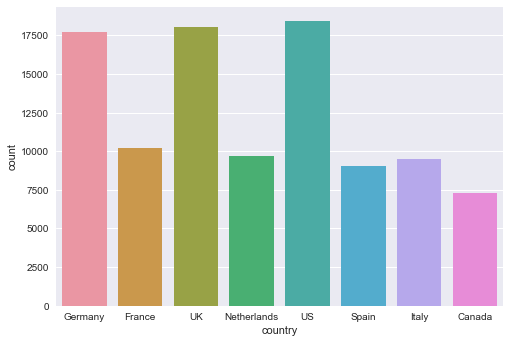

In [9]:
sns.countplot(x='country',data=df)
plt.show()

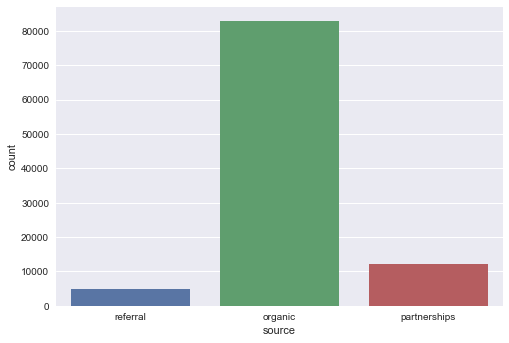

In [10]:
sns.countplot(x='source',data=df)
plt.show()

## Churn Rate Analysis

In [11]:
def churn_rate_plots(segment_by):
    """Convenience function for plotting segmented churn rates"""
    # Initialize sub-plots for 2 columns
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,6))
    
    # On the left, plot the distribution
    sns.countplot(x=segment_by, data=df, ax=ax1)
    
    # On the right, plot the retention rate
    sns.barplot(x=segment_by, y='active', data=df, ax=ax2)

    # Set title
    plt.suptitle('Retention Rate by {}'.format(segment_by.capitalize()))
    plt.show()

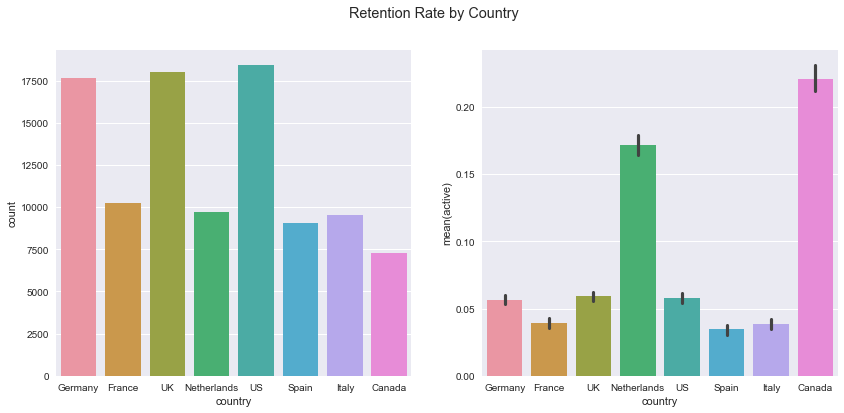

In [12]:
churn_rate_plots('country')

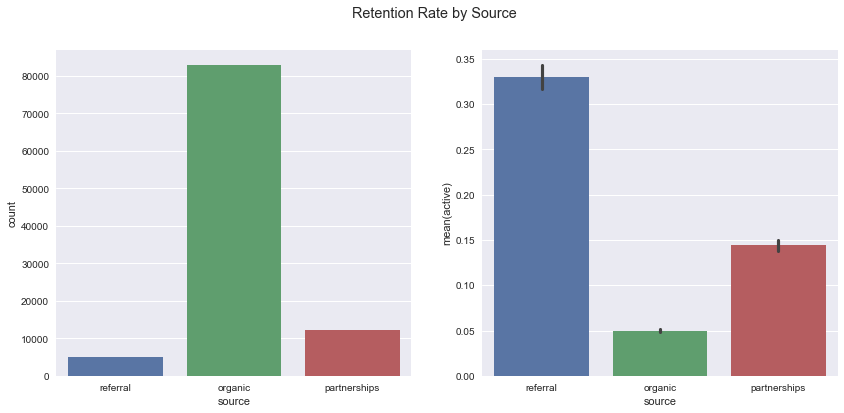

In [13]:
churn_rate_plots('source')

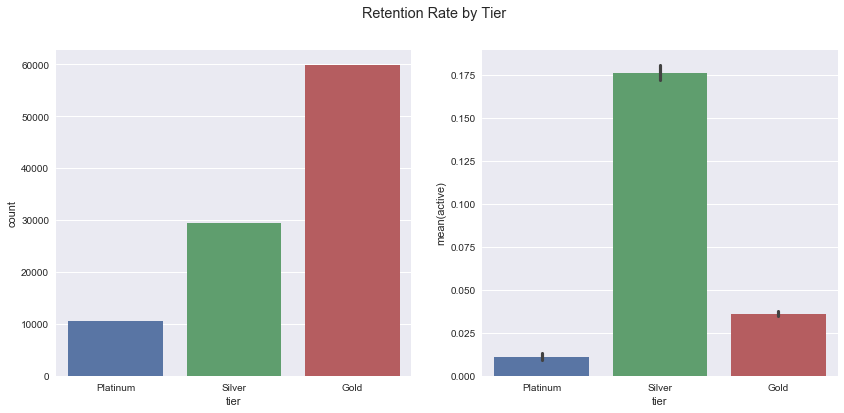

In [14]:
churn_rate_plots('tier')

In [15]:
1 - df.groupby(['tier'])['active'].mean()  #Churn Rate by Tier over 9 Months

tier
Gold        0.963735
Platinum    0.988809
Silver      0.823460
Name: active, dtype: float64

In [16]:
df.groupby(['tier'])['tenure'].mean() #Average Tenure by Tier

tier
Gold        2.135716
Platinum    1.474704
Silver      3.844327
Name: tenure, dtype: float64

In [17]:
df_monthly_summary = df.groupby(['tier','tenure'])['member_id'].count().reset_index()

In [18]:
tier_summary = df.groupby(['tier'])['member_id'].count().reset_index()

In [19]:
merged_df = pd.merge(df_monthly_summary,tier_summary,on='tier')

In [20]:
merged_df.head()

,tier,tenure,member_id_x,member_id_y
0,Gold,1,33147,59838
1,Gold,2,13255,59838
2,Gold,3,5002,59838
3,Gold,4,2460,59838
4,Gold,5,1413,59838


In [21]:
merged_df['churn_rate'] = (merged_df.member_id_x / merged_df.member_id_y)

In [22]:
merged_df

,tier,tenure,member_id_x,member_id_y,churn_rate
0,Gold,1,33147,59838,0.553946
1,Gold,2,13255,59838,0.221515
2,Gold,3,5002,59838,0.083592
3,Gold,4,2460,59838,0.041111
4,Gold,5,1413,59838,0.023614
5,Gold,6,877,59838,0.014656
6,Gold,7,675,59838,0.011280
7,Gold,8,839,59838,0.014021
8,Gold,9,2170,59838,0.036265
9,Platinum,1,8003,10634,0.752586


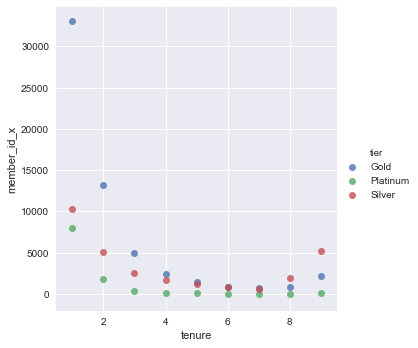

In [23]:
sns.lmplot(x="tenure", y="member_id_x", hue="tier",
               truncate=True, size=5, data=merged_df,fit_reg=False)
plt.show()

## Insights
* Retention rates are much higher in Canada & the Netherlands.

* Referral enrollments have a much higher retention rate. 

* Gold level enrollees are churning at approximately 1% every month for the last few months. This trend is exected to continue.

* Platinum level enrollees are churning between .2 - 1% every month for the last few months. This trend is expected to continue, with loss of nearly all remaining enrollees.

* Silver enrollees have the lowest churn rate, averaging over 17% after 9 months. However, current churn is higher around 3 - 6%. This trend is expected to continue. 

## Predicting Customer Tenure

In [24]:
#Lets try a Decision Tree & Random Forest
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import graphviz

In [25]:
df_filter = df[df.tenure != 9] #Excluding Customers Still Enrolled
X = df_filter[['tier','source','country']]
X = pd.get_dummies(X)
y = df_filter['tenure']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3,random_state = 1234)

In [26]:
# Consider Decision Trees
dt_model = DecisionTreeRegressor()

dt_model.fit(X_train,y_train)

dt_model.score(X_test,y_test)

0.16663979524419659

In [27]:
predictions = dt_model.predict(X_test)

rmse = (sum((predictions - y_test)**2)/len(X_test))**.5

In [28]:
print(rmse)

1.547997023


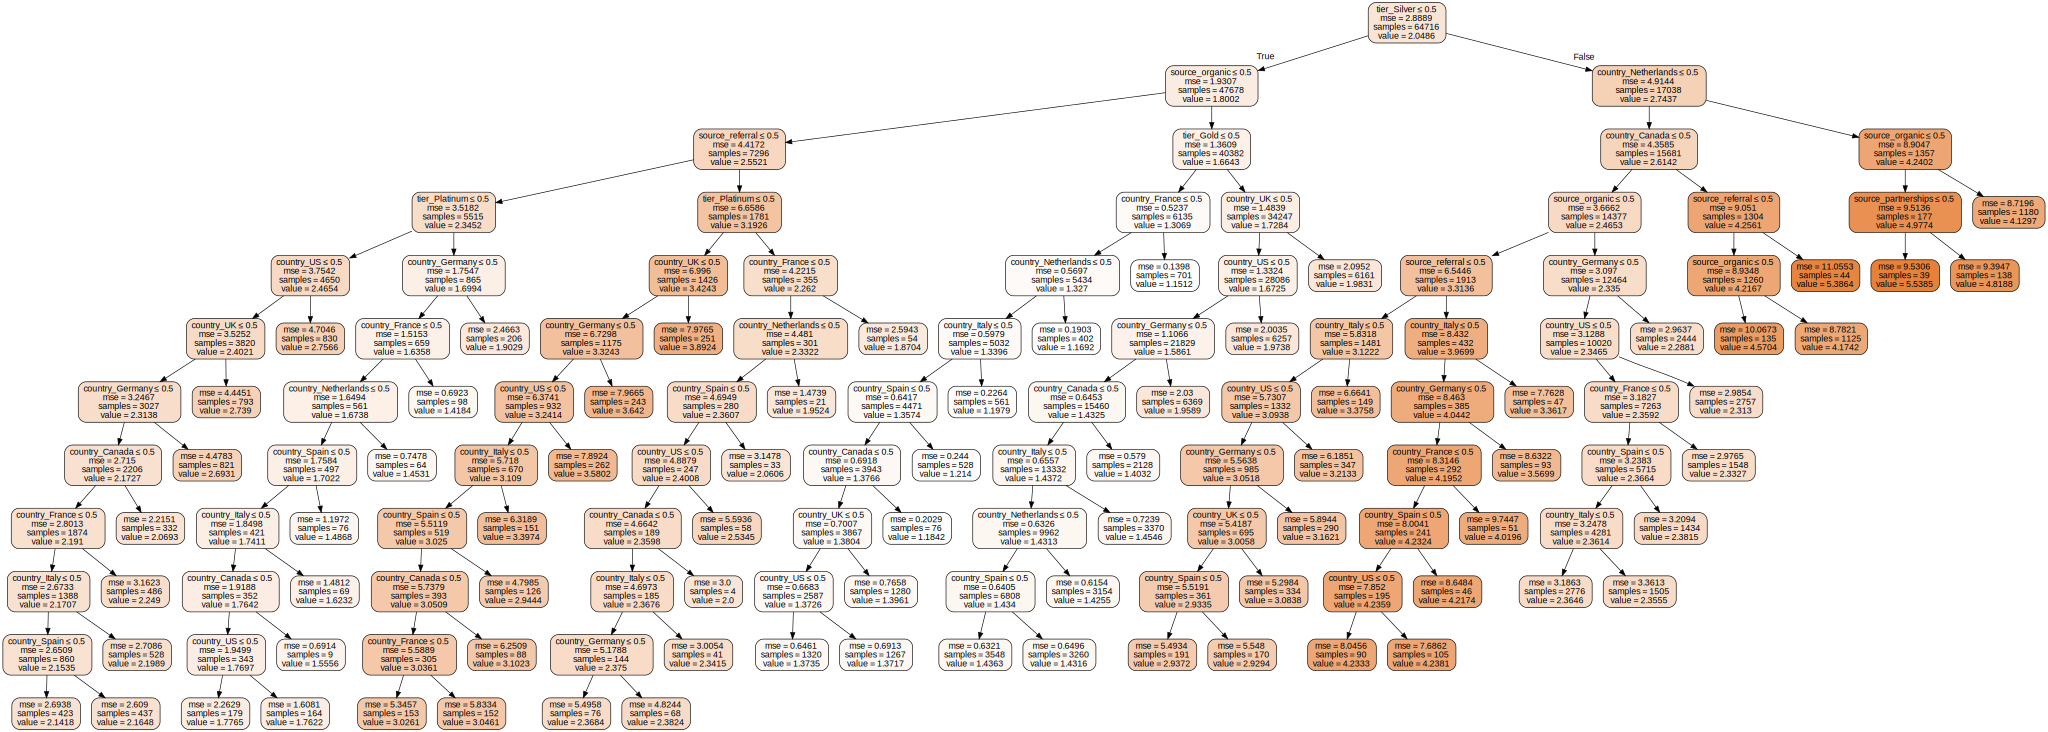

In [29]:
dot_data = sklearn.tree.export_graphviz(dt_model, out_file=None, 
                         feature_names=X.columns,  
                         class_names=y.unique(),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [30]:
rf_model = RandomForestRegressor(n_estimators=500)

rf_model.fit(X_train,y_train)

rf_model.score(X_test,y_test)

0.1666521358987948

In [31]:
predictions = rf_model.predict(X_test)

rmse = (sum((predictions - y_test)**2)/len(X_test))**.5
rmse

1.5479855613476445

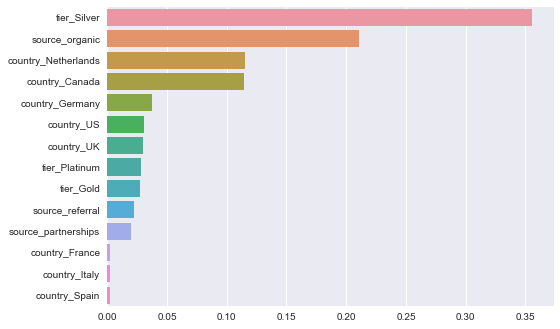

In [32]:
feature_importance = {X_test.columns[item] : rf_model.feature_importances_[item] for item in range(0,14)}
list_order = sorted(feature_importance,key=feature_importance.get,reverse=True)

sns.barplot([feature_importance[item] for item in list_order],list_order)
plt.show()

## Concluding Remarks

Random Forest and Decision Tree algorithms perform approximately the same on the test data, with an RMSE of approximately 1.55 months. There are a few variables of importance that stand out in the figure above, which confirm our understanding gained during EDA. The Silver tier is the most important feature for determining tenure, particularly longer tenure. Organic sourcing is also important, namely non-organic sourcing is best. Two countries, the Netherlands and Canada, have the longest tenure. Final recommendations include:
* Promotion of Silver Tier above others.
* Increase marketing in the Netherlands and Canada.
* Re-visit partnership agreements.
* Develop referral incentive to increase number of referrals. 


## Next Steps

Additional parameter tuning for the Random Forest algorithm may improve predictive accuracy.